<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/characteristics/scalability_and_speed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import time
import os.path
import requests
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

!mkdir data #let us create data folder to hold our data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

In [31]:
# Denmune's Paramaters
verpose_mode = False # view in-depth analysis of time complexity and outlier detection, num of clusters
show_plot = False  # show plots on/off
show_noise = True # show noise and outlier on/off
knn = 25
data_scale = []

for n in range(100, 10000, 100):
    n_samples = n
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
    
    data= noisy_circles[0]
    data_labels = noisy_circles[1]
    dm = DenMune(data=data, k_nearest=knn, verpose=verpose_mode, show_noise=show_noise, rgn_tsne=True)
    labels_pred = dm.fit_predict()
    time_exec = dm.analyzer['exec_time']['DenMune']
    data_scale.append([n, time_exec ])

    print('data size:',n ,  'time:' , round(time_exec,4), 'seconds')
    

data size: 100 time: 0.0304 seconds
data size: 200 time: 0.0632 seconds
data size: 300 time: 0.1008 seconds
data size: 400 time: 0.119 seconds
data size: 500 time: 0.1399 seconds
data size: 600 time: 0.4311 seconds
data size: 700 time: 0.3286 seconds
data size: 800 time: 0.2554 seconds
data size: 900 time: 0.4018 seconds
data size: 1000 time: 0.4334 seconds
data size: 1100 time: 0.4358 seconds
data size: 1200 time: 0.4925 seconds
data size: 1300 time: 0.5528 seconds
data size: 1400 time: 0.4195 seconds
data size: 1500 time: 0.8242 seconds
data size: 1600 time: 0.6399 seconds
data size: 1700 time: 0.7758 seconds
data size: 1800 time: 0.7928 seconds
data size: 1900 time: 0.8465 seconds
data size: 2000 time: 0.9179 seconds
data size: 2100 time: 0.9004 seconds
data size: 2200 time: 1.1624 seconds
data size: 2300 time: 0.9158 seconds
data size: 2400 time: 0.9855 seconds
data size: 2500 time: 1.252 seconds
data size: 2600 time: 1.1364 seconds
data size: 2700 time: 1.2537 seconds
data size: 2

In [34]:
x, y = zip(*data_scale)
window = 10
cumsum, moving_aves = [0], []

for i, n in enumerate(y, 1):
    cumsum.append(cumsum[i-1] + n)
    if i>=window:
        moving_ave = (cumsum[i] - cumsum[i-window])/window
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
y = moving_aves        

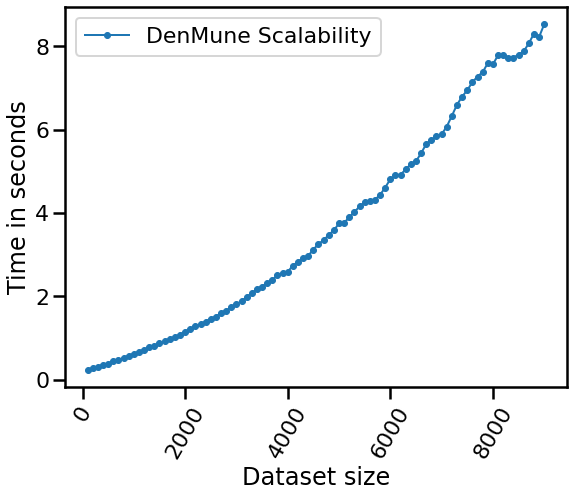

In [35]:
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[9, 7])
ax.plot(x[:-window+1], y, marker='.', linewidth=2, label='DenMune Scalability')
plt.xticks(rotation=60)
ax.set_xlabel('Dataset size')
ax.set_ylabel('Time in seconds')
plt.legend()
plt.show()